### Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("airquality.csv")

### Exploratory Data Analysis

#### Data Info

In [3]:
rows_total = df.shape[0]
print(f"Total rows: {rows_total}")

Total rows: 153


In [4]:
df.head()

,Number,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [5]:
df.describe()

,Number,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Number   153 non-null    int64  
 1   Ozone    116 non-null    float64
 2   Solar.R  146 non-null    float64
 3   Wind     153 non-null    float64
 4   Temp     153 non-null    int64  
 5   Month    153 non-null    int64  
 6   Day      153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.5 KB


#### Duplicates

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
148    False
149    False
150    False
151    False
152    False
Length: 153, dtype: bool

#### Missing Values

In [8]:
df.isnull().sum()

Number      0
Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

Dropping all missing values

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Number     0
Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [11]:
new_total_rows = df.shape[0]
print(f"After dropping mising values, new total rows: {new_total_rows}")
print(f"Dropped rows: {rows_total - new_total_rows}")

After dropping mising values, new total rows: 111
Dropped rows: 42


In [12]:
df.to_csv("cleaned_data.csv", index = False)

#### Visual

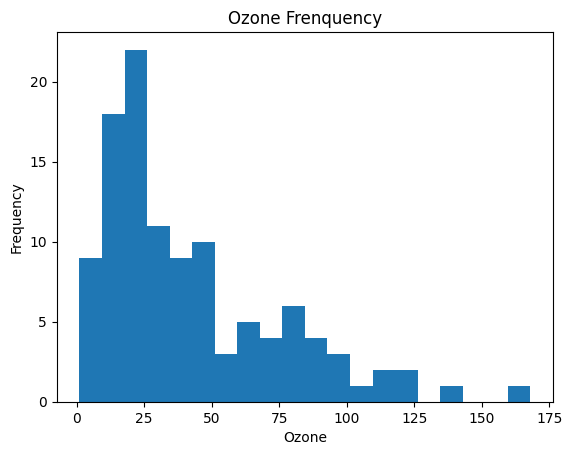

In [13]:
plt.hist(df['Ozone'], bins = 20)
plt.xlabel("Ozone")
plt.ylabel("Frequency")
plt.title("Ozone Frenquency")
plt.show()

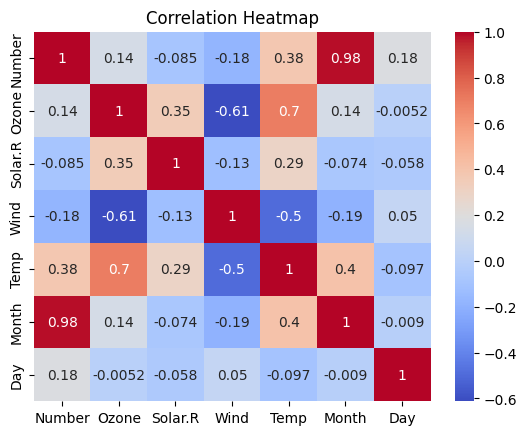

In [14]:
correlation_matrix = df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

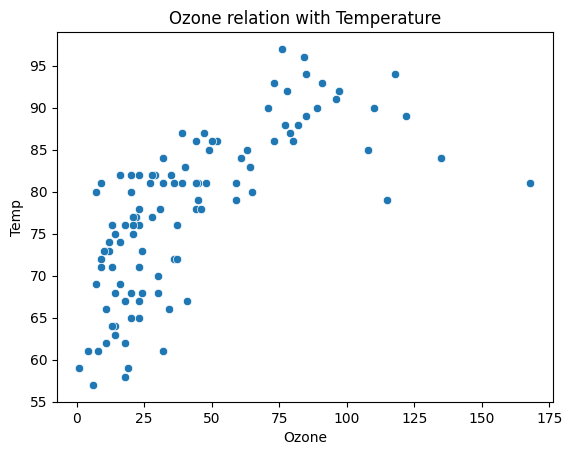

In [15]:
sb.scatterplot(x = "Ozone", y = "Temp", data = df)
plt.title("Ozone relation with Temperature")
plt.show()

#### Outliers

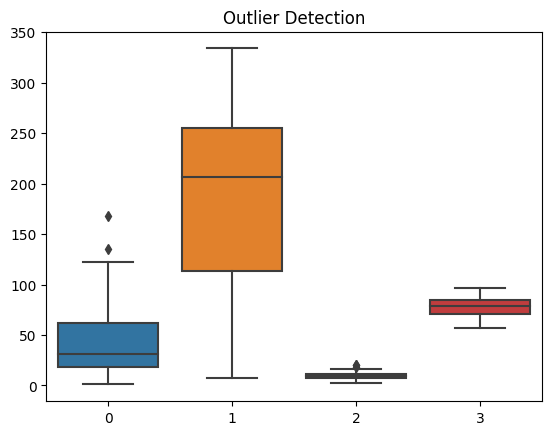

In [16]:
sb.boxplot(data = [df['Ozone'], df['Solar.R'], df['Wind'], df['Temp']])
plt.title("Outlier Detection")
plt.show()

No need to remove outliers

### Training ML Model

#### Splitting Dataset

In [17]:
data = pd.read_csv("cleaned_data.csv")

In [18]:
features = ['Ozone', 'Solar.R']
target = ['Temp']
X = data[features]
y = data[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
X_train.to_csv("xtrain.csv")
X_test.to_csv("xtest.csv")
y_train.to_csv("ytrain.csv")
y_test.to_csv("ytest.csv")

#### Training Linear Regression Model

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

#### Evaluating the model

In [65]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root mean squared error of the prediction: {rmse}")

Root mean squared error of the prediction: 8.9073643631379


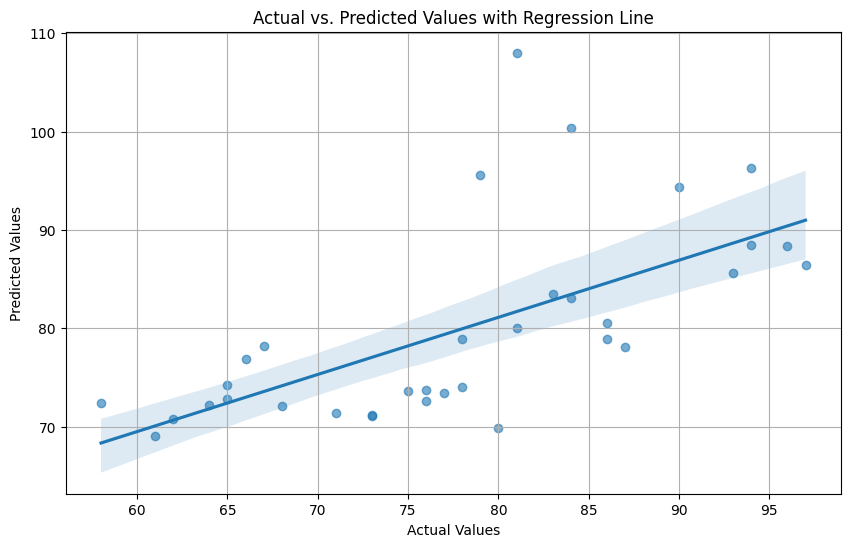

In [66]:
plt.figure(figsize=(10, 6))
sb.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6})
plt.title('Actual vs. Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

We have successfully predicted the target variable using regression model